<a href="https://colab.research.google.com/github/bahram3000/google_colab/blob/main/goldmfc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from my_func_pkg import most_frequency_cenarios,blind_boundary_exp_smooth_curve
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
gold_dt=yf.download(tickers='GC=F',interval='1d')

[*********************100%***********************]  1 of 1 completed


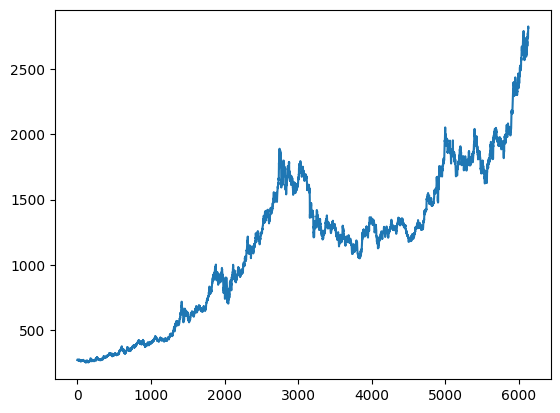

In [3]:
plt.plot(gold_dt['Close'].values)

In [4]:
future_len=30

In [5]:
gold_close=gold_dt['Close'].values[:,0]

In [6]:
bbefcg=blind_boundary_exp_smooth_curve(gold_close,forward_walk2=future_len)

In [7]:
mfcg=most_frequency_cenarios(gold_close,nbins=20,ngreater=0.9,lcenarios=future_len)

100%|██████████| 100/100 [00:40<00:00,  2.46it/s]


In [20]:
#befcg[-future_len:,:]

In [9]:
#plt.plot(bbefcg)

In [12]:
endbb=bbefcg[-future_len:,:]

In [19]:
import time
import datetime

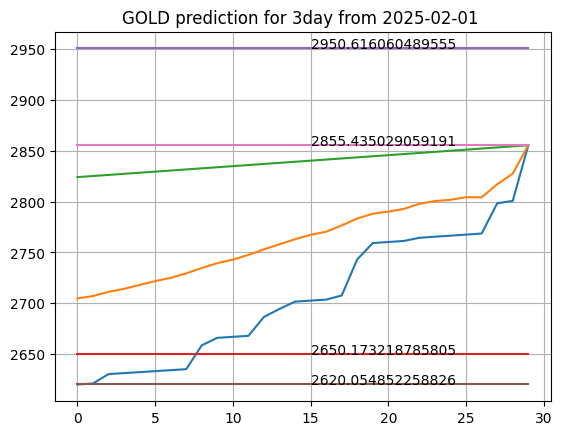

In [20]:
timestamp = time.time()
datetime_object = datetime.datetime.fromtimestamp(timestamp)
formatted_time = datetime_object.strftime('%Y-%m-%d')
plt.plot(endbb)
plt.plot([mfcg[0]]*future_len)
plt.plot([mfcg[-1]]*future_len)
plt.plot([np.min(endbb)]*future_len)
plt.plot([np.max(endbb)]*future_len)
plt.text(x=future_len/2,y=mfcg[0],s=f'{mfcg[0]}')
plt.text(x=future_len/2,y=mfcg[-1],s=f'{mfcg[-1]}')
plt.text(x=future_len/2,y=np.min(endbb),s=f'{np.min(endbb)}')
plt.text(x=future_len/2,y=np.max(endbb),s=f'{np.max(endbb)}')
plt.grid()
plt.title(f'GOLD prediction for 3day from {formatted_time} ')
plt.show()